In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
print("Customers Data:")
print(customers.head(), "\n")

print("Products Data:")
print(products.head(), "\n")

print("Transactions Data:")
print(transactions.head(), "\n")

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C012

In [4]:
print("Customers Info:")
print(customers.info(), "\n")

print("Products Info:")
print(products.info(), "\n")

print("Transactions Info:")
print(transactions.info(), "\n")

Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 

Products Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None 

Transactions Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Nu

In [5]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [6]:
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')

In [7]:
# Make a year column
merged_data['TransactionYear'] = merged_data['TransactionDate'].dt.year

In [8]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y,TransactionYear
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024


In [9]:
merged_data.isnull().sum().sum()

np.int64(0)

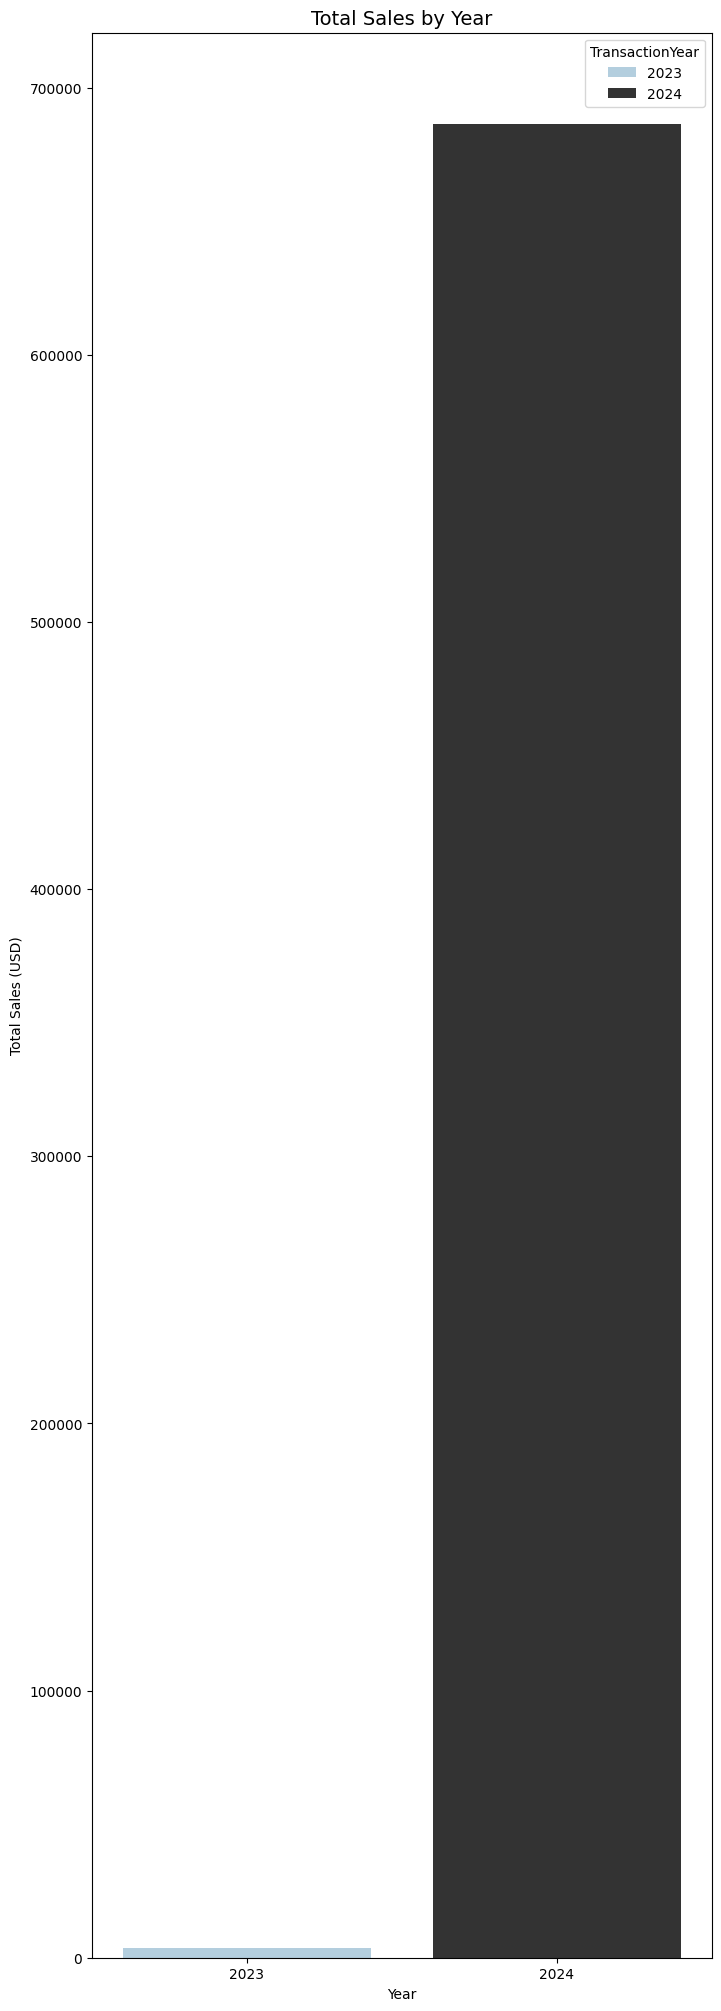

In [10]:
# Total sales per year

yearly_sales = merged_data.groupby('TransactionYear')['TotalValue'].sum().reset_index()
plt.figure(figsize=(8, 25))  # To show the stark difference
sns.barplot(x='TransactionYear', y='TotalValue', data=yearly_sales, hue='TransactionYear', palette='Blues_d')
plt.title('Total Sales by Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Sales (USD)')
plt.show()

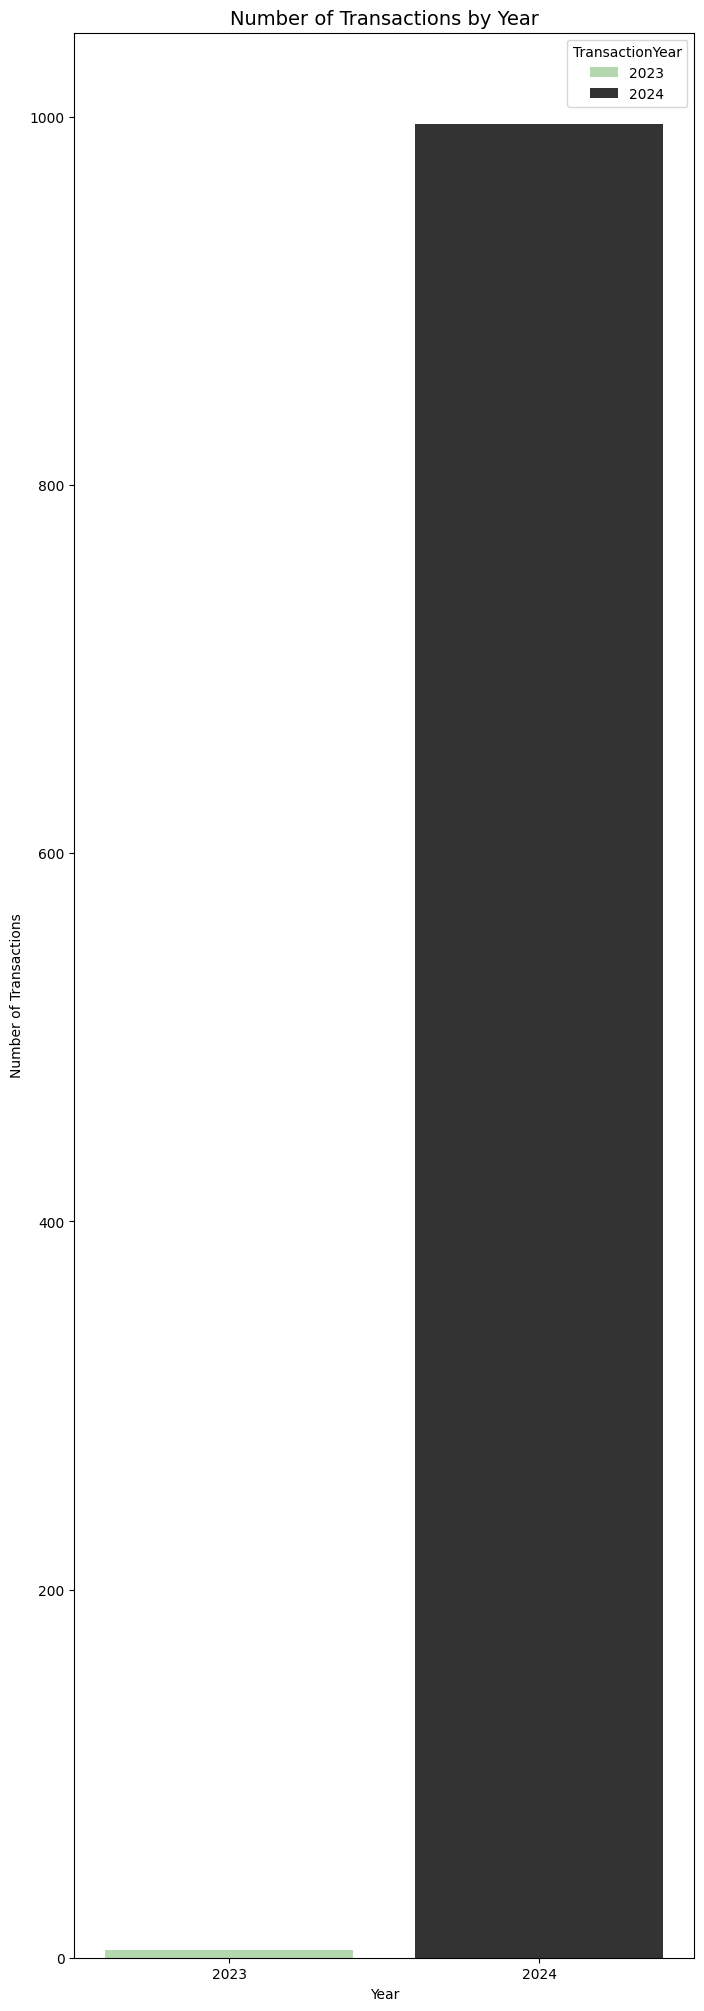

In [11]:
# Number of transactions per year

yearly_transactions = merged_data.groupby('TransactionYear')['TransactionID'].count().reset_index()
plt.figure(figsize=(8, 25))  # To show the stark differrence
sns.barplot(x='TransactionYear', y='TransactionID', data=yearly_transactions, hue='TransactionYear', palette='Greens_d')
plt.title('Number of Transactions by Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.show()

In [12]:
# Separating 2024 data
data_2024 = merged_data[merged_data['TransactionYear'] == 2024]

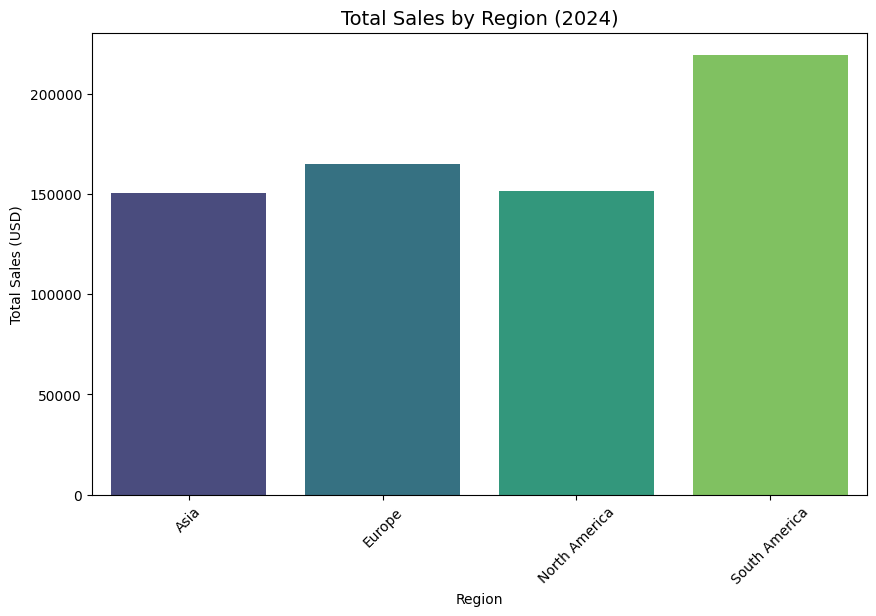

In [13]:
# Sales by Region (2024)

region_sales = data_2024.groupby('Region')['TotalValue'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='TotalValue', data=region_sales, hue='Region', palette='viridis')
plt.title('Total Sales by Region (2024)', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()

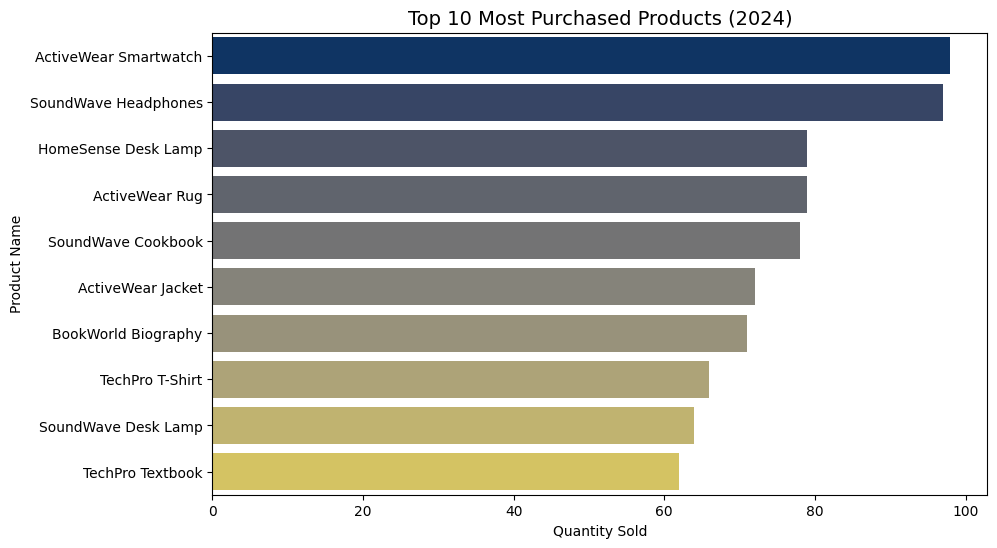

In [14]:
# Most Popular Products (2024)

product_sales = data_2024.groupby('ProductName')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Quantity', y='ProductName', data=product_sales.head(10), hue='ProductName', palette='cividis')
plt.title('Top 10 Most Purchased Products (2024)', fontsize=14)
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

In [15]:
# 2023 transactions overview

data_2023 = merged_data[merged_data['TransactionYear'] == 2023]

print(data_2023.head())
print(f"Total 2023 transactions: {data_2023.shape[0]}")

    TransactionID CustomerID ProductID     TransactionDate  Quantity  \
32         T00605      C0017      P057 2023-12-31 03:27:43         4   
225        T00869      C0081      P061 2023-12-30 15:29:12         2   
729        T00845      C0154      P083 2023-12-31 15:44:04         2   
822        T00154      C0040      P020 2023-12-31 06:53:54         4   

     TotalValue  Price_x     CustomerName         Region SignupDate  \
32       958.80   239.70    Jennifer King         Europe 2023-12-05   
225      313.92   156.96  Kimberly Turner         Europe 2024-02-24   
729      911.44   455.72     Robert Sharp  North America 2024-10-27   
822     1585.36   396.34  Michael Harrell           Asia 2022-03-07   

               ProductName     Category  Price_y  TransactionYear  
32   ActiveWear Smartphone  Electronics   239.70             2023  
225    HomeSense Desk Lamp   Home Decor   156.96             2023  
729  ActiveWear Smartwatch  Electronics   455.72             2023  
822      Ac

C:\Users\Neel\AppData\Local\Temp\ipykernel_16680\1974342834.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='Blues_d')


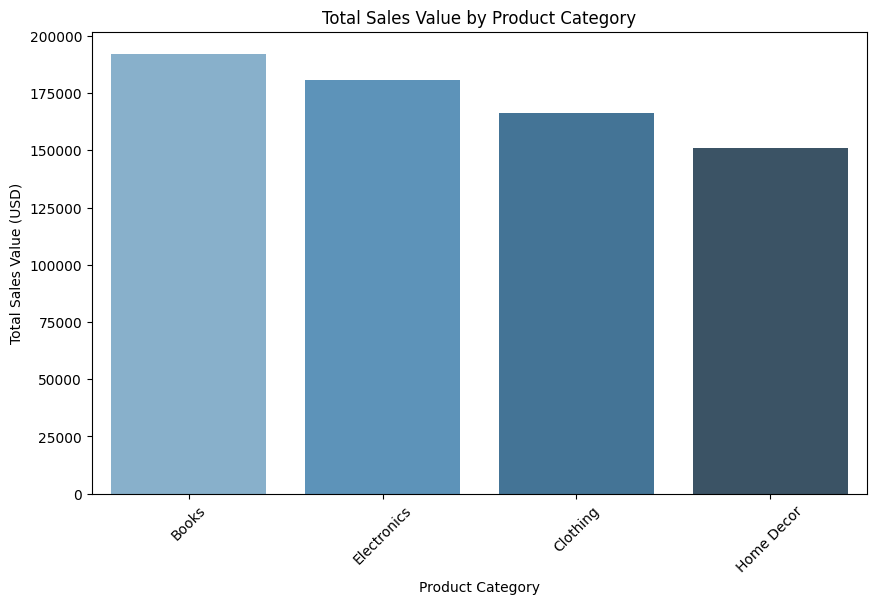

In [16]:
plt.figure(figsize=(10, 6))
category_sales = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values, palette='Blues_d')
plt.title('Total Sales Value by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Value (USD)')
plt.xticks(rotation=45)
plt.show()

C:\Users\Neel\AppData\Local\Temp\ipykernel_16680\1803310444.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_quantity.index, y=category_quantity.values, palette="coolwarm")


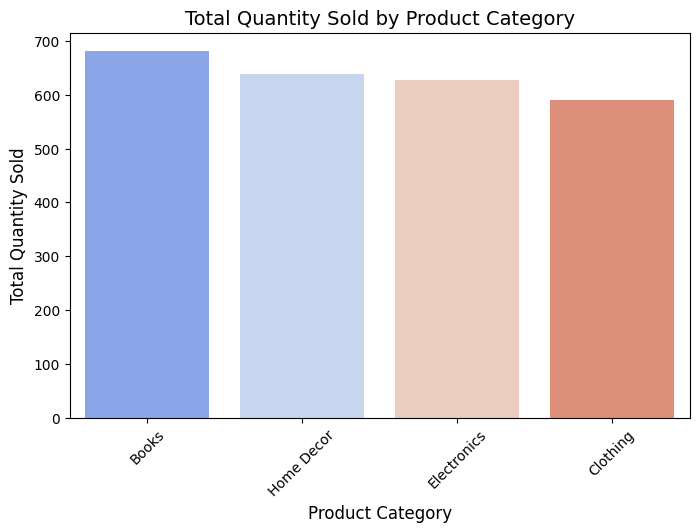

In [17]:
# Grouping by category to find total sales volume (Quantity)
category_quantity = merged_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

# Plotting the total quantity sold by category
plt.figure(figsize=(8, 5))
sns.barplot(x=category_quantity.index, y=category_quantity.values, palette="coolwarm")
plt.title("Total Quantity Sold by Product Category", fontsize=14)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Quantity Sold", fontsize=12)
plt.xticks(rotation=45)
plt.show()

C:\Users\Neel\AppData\Local\Temp\ipykernel_16680\902587089.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.values, y=region_sales.index, palette='coolwarm')


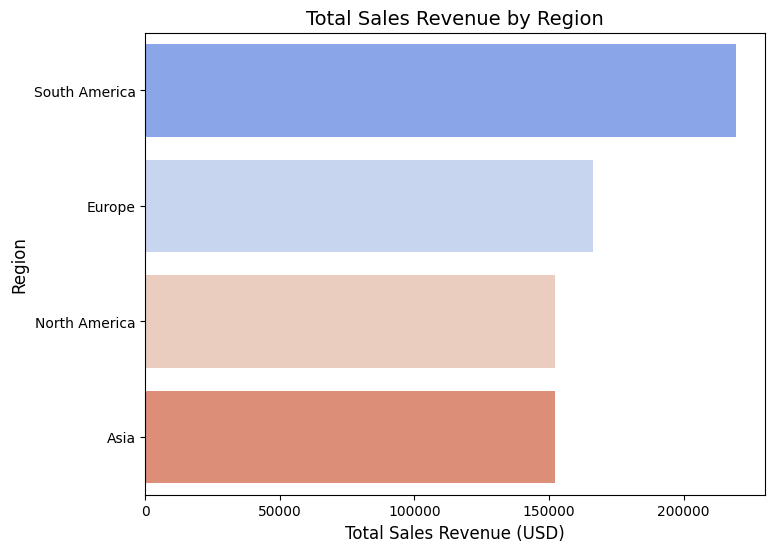

In [18]:
# Calculating total sales revenue by region
region_sales = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

# Plotting region-wise total sales revenue
plt.figure(figsize=(8, 6))
sns.barplot(x=region_sales.values, y=region_sales.index, palette='coolwarm')
plt.title("Total Sales Revenue by Region", fontsize=14)
plt.xlabel("Total Sales Revenue (USD)", fontsize=12)
plt.ylabel("Region", fontsize=12)
plt.show()

C:\Users\Neel\AppData\Local\Temp\ipykernel_16680\3292529844.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_transaction_value.index, y=avg_transaction_value.values, palette='viridis')


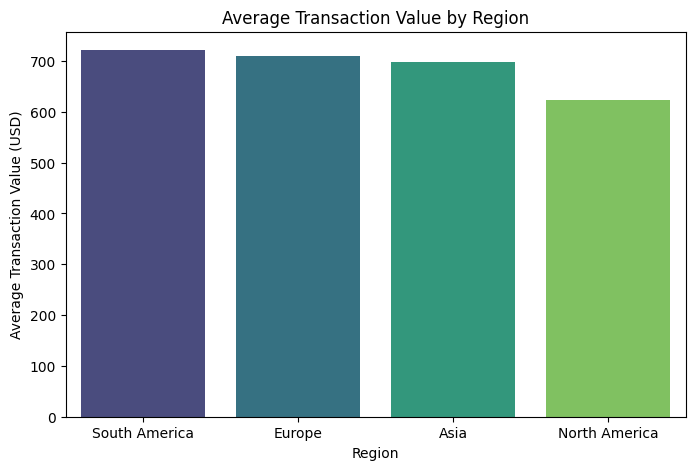

In [19]:
# Calculating average transaction value by region
avg_transaction_value = merged_data.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_transaction_value.index, y=avg_transaction_value.values, palette='viridis')
plt.title('Average Transaction Value by Region')
plt.xlabel('Region')
plt.ylabel('Average Transaction Value (USD)')
plt.show()

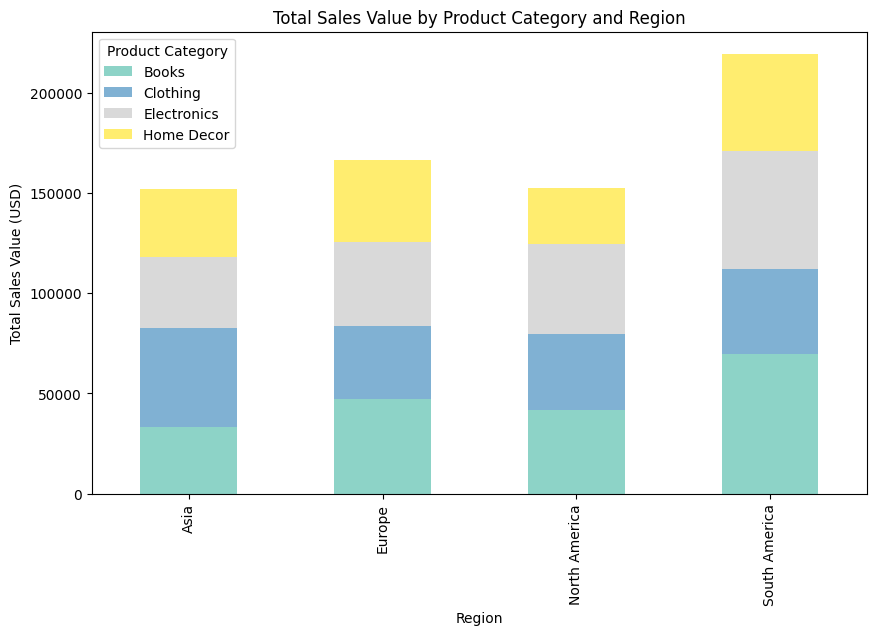

In [20]:
# Grouping by Region and Category to get total sales value
category_region_sales = merged_data.groupby(['Region', 'Category'])['TotalValue'].sum().unstack().fillna(0)

# Plotting
category_region_sales.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Total Sales Value by Product Category and Region')
plt.xlabel('Region')
plt.ylabel('Total Sales Value (USD)')
plt.legend(title='Product Category')
plt.show()

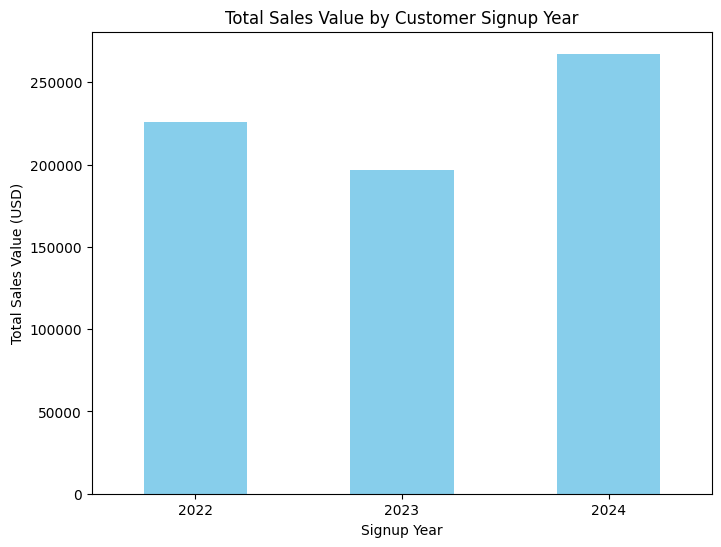

In [21]:
# Extracting the year from SignupDate
merged_data['SignupYear'] = pd.to_datetime(merged_data['SignupDate']).dt.year

# Grouping by SignupYear to get total sales value
signup_year_sales = merged_data.groupby('SignupYear')['TotalValue'].sum()

# Plotting
signup_year_sales.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Total Sales Value by Customer Signup Year')
plt.xlabel('Signup Year')
plt.ylabel('Total Sales Value (USD)')
plt.xticks(rotation=0)
plt.show()


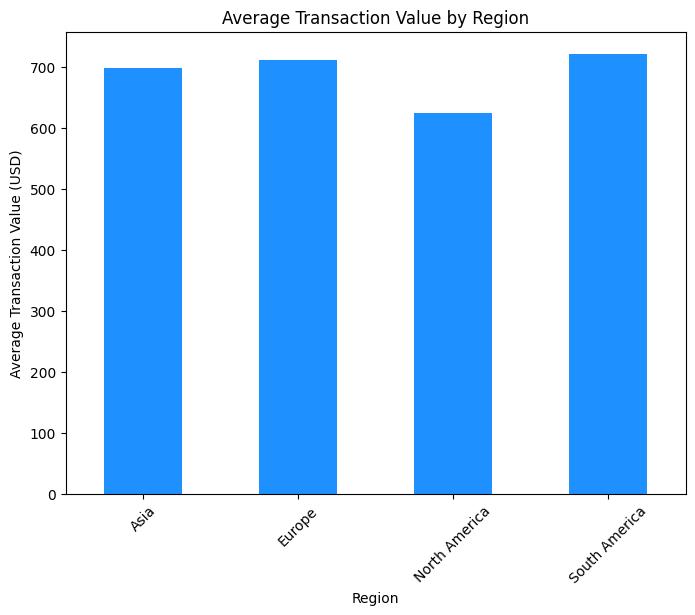

Region
Asia             697.591606
Europe           710.489872
North America    624.235246
South America    721.554474
Name: TotalValue, dtype: float64


In [22]:
# Grouping by Region to get average transaction value
region_avg_transaction_value = merged_data.groupby('Region')['TotalValue'].mean()

# Plotting
region_avg_transaction_value.plot(kind='bar', color='dodgerblue', figsize=(8, 6))
plt.title('Average Transaction Value by Region')
plt.xlabel('Region')
plt.ylabel('Average Transaction Value (USD)')
plt.xticks(rotation=45)
plt.show()

# Display the calculated data
print(region_avg_transaction_value)


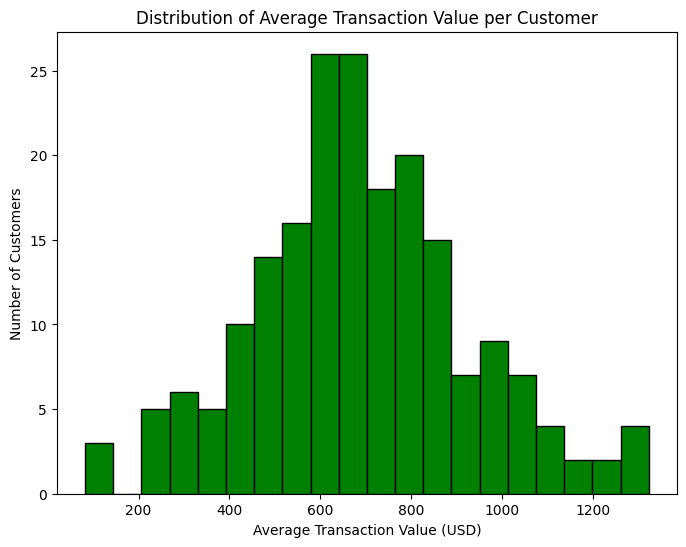

In [23]:
# Grouping by CustomerID to calculate the average total value spent per customer
avg_transaction_value = merged_data.groupby('CustomerID')['TotalValue'].mean()

# Plotting
avg_transaction_value.plot(kind='hist', bins=20, color='green', edgecolor='black', figsize=(8, 6))
plt.title('Distribution of Average Transaction Value per Customer')
plt.xlabel('Average Transaction Value (USD)')
plt.ylabel('Number of Customers')
plt.show()

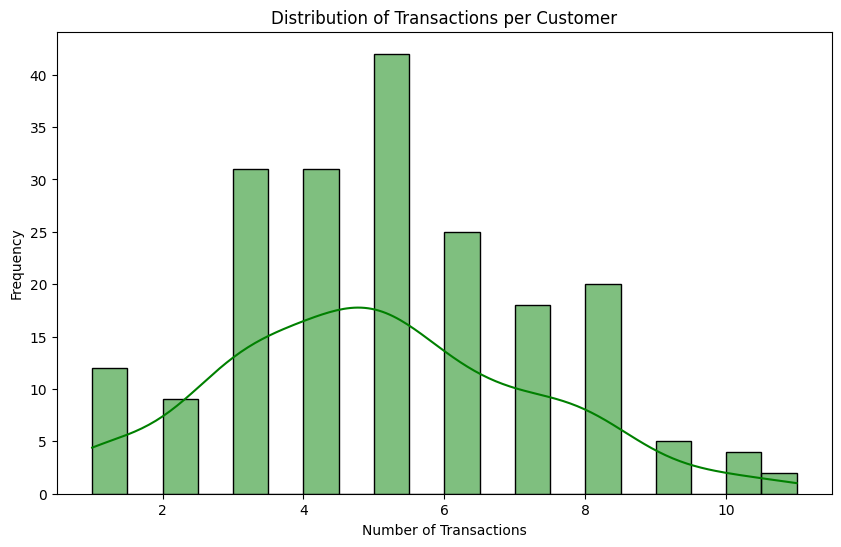

In [24]:
# Count the number of transactions per customer
transactions_per_customer = merged_data.groupby('CustomerID').size()

# Plot the distribution of transactions per customer
plt.figure(figsize=(10, 6))
sns.histplot(transactions_per_customer, bins=20, kde=True, color='green')
plt.title('Distribution of Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()


In [25]:
transactions_per_customer.describe()

count    199.000000
mean       5.025126
std        2.198340
min        1.000000
25%        3.000000
50%        5.000000
75%        6.000000
max       11.000000
dtype: float64

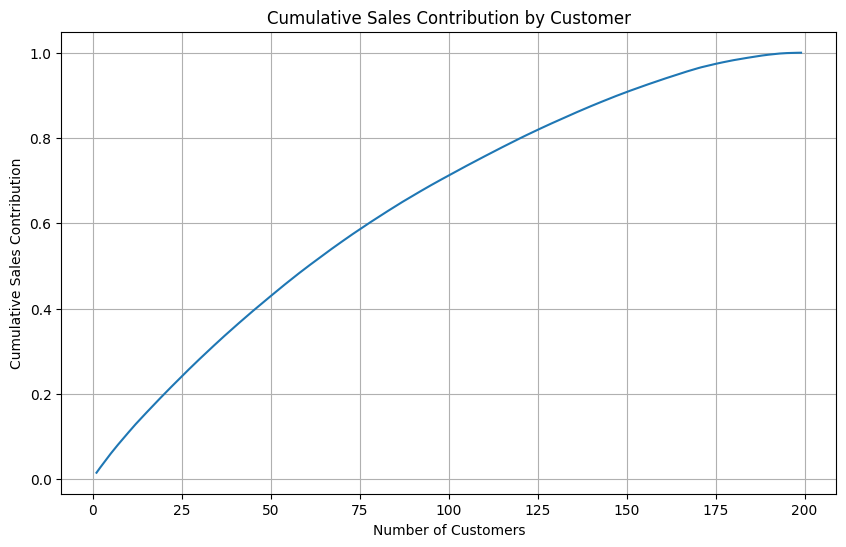

In [26]:
# Calculate total sales per customer
customer_sales = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)

# Calculate cumulative sales contribution
customer_sales_cumulative = customer_sales.cumsum() / customer_sales.sum()

# Plot cumulative sales contribution
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, len(customer_sales_cumulative) + 1), y=customer_sales_cumulative)
plt.xlabel('Number of Customers')
plt.ylabel('Cumulative Sales Contribution')
plt.title('Cumulative Sales Contribution by Customer')
plt.grid(True)
plt.show()


In [27]:
print(customer_sales_cumulative.head())
print(customer_sales_cumulative.describe())

# Percentage of sales contributed by the top 10 customers
top_10_sales_percentage = customer_sales_cumulative.iloc[9] * 100
print(f"Percentage of total sales contributed by the top 10 customers: {top_10_sales_percentage:.2f}%")

# Percentage of sales contributed by the top 50 customers
top_50_sales_percentage = customer_sales_cumulative.iloc[49] * 100
print(f"Percentage of total sales contributed by the top 50 customers: {top_50_sales_percentage:.2f}%")


CustomerID
C0141    0.015469
C0054    0.027122
C0065    0.038229
C0156    0.049294
C0082    0.060269
Name: TotalValue, dtype: float64
count    199.000000
mean       0.650456
std        0.286727
min        0.015469
25%        0.433269
50%        0.712379
75%        0.906419
max        1.000000
Name: TotalValue, dtype: float64
Percentage of total sales contributed by the top 10 customers: 11.02%
Percentage of total sales contributed by the top 50 customers: 42.98%


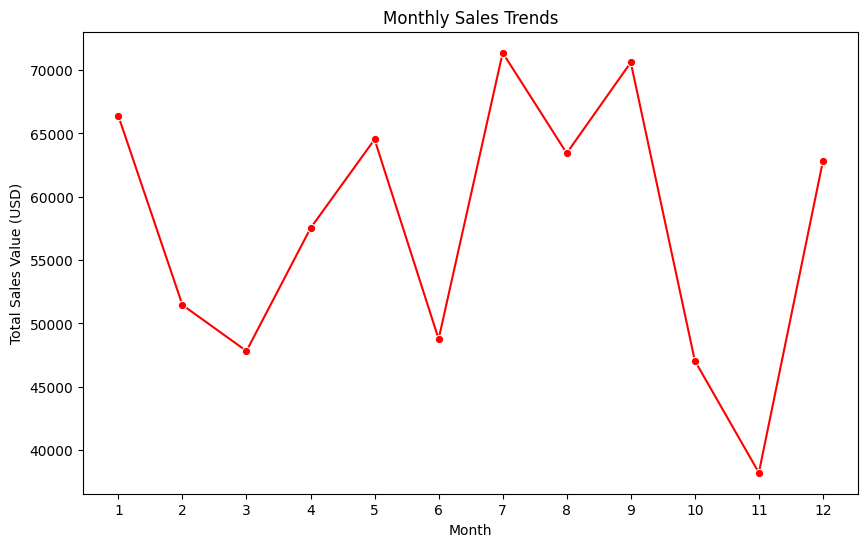

In [28]:
merged_data['TransactionMonth'] = pd.to_datetime(merged_data['TransactionDate']).dt.month
monthly_sales = merged_data.groupby('TransactionMonth')['TotalValue'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='red')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales Value (USD)')
plt.xticks(monthly_sales.index)
plt.show()


<Figure size 1200x800 with 0 Axes>

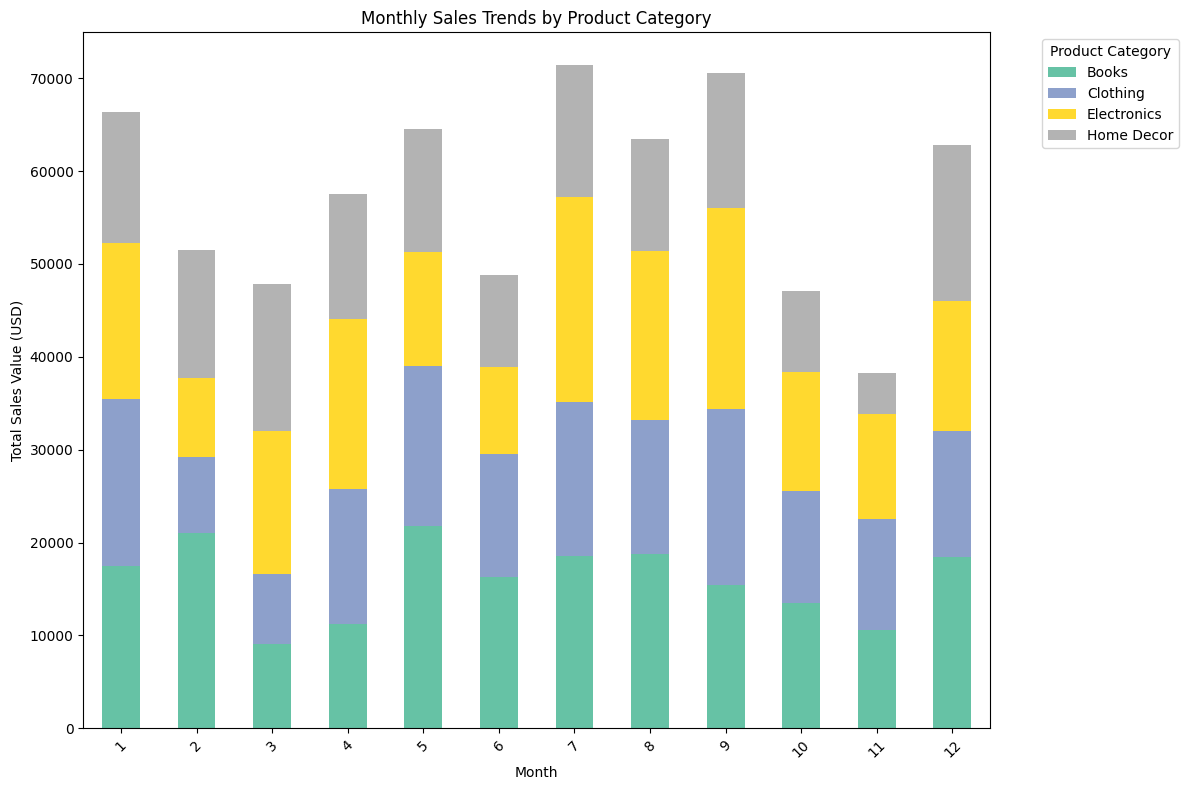

In [29]:
# Grouping by TransactionMonth and Category to get the total sales for each category per month
monthly_category_sales = merged_data.groupby(['TransactionMonth', 'Category'])['TotalValue'].sum().unstack()

# Plotting the stacked bar chart
plt.figure(figsize=(12, 8))
monthly_category_sales.plot(kind='bar', stacked=True, colormap='Set2', figsize=(12, 8))

plt.title('Monthly Sales Trends by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Sales Value (USD)')
plt.xticks(rotation=45)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

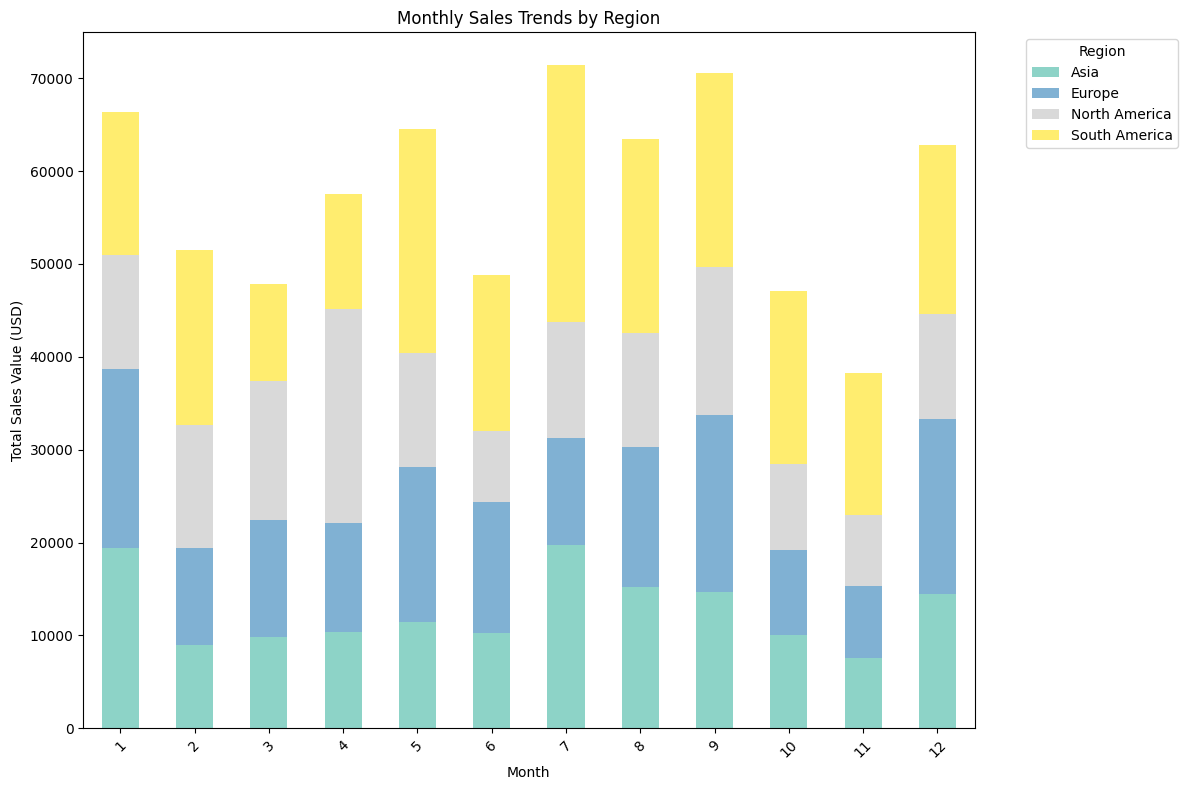

In [30]:
# Grouping by TransactionMonth and Region to get the total sales for each region per month
monthly_region_sales = merged_data.groupby(['TransactionMonth', 'Region'])['TotalValue'].sum().unstack()

plt.figure(figsize=(12, 8))
monthly_region_sales.plot(kind='bar', stacked=True, colormap='Set3', figsize=(12, 8))

# Customizing the plot
plt.title('Monthly Sales Trends by Region')
plt.xlabel('Month')
plt.ylabel('Total Sales Value (USD)')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
